<a href="https://colab.research.google.com/github/inachenyx/GZPeite/blob/main/4mmflowrate.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

flow rate in (ml/h) is: [  13.248   56.856  116.424  233.244  345.888  463.356  577.332  690.816
  804.012  921.168 1036.056 1167.888 1393.632 1628.376 1863.384 2092.704
 2307.72 ]


(0.0, 2500.0)

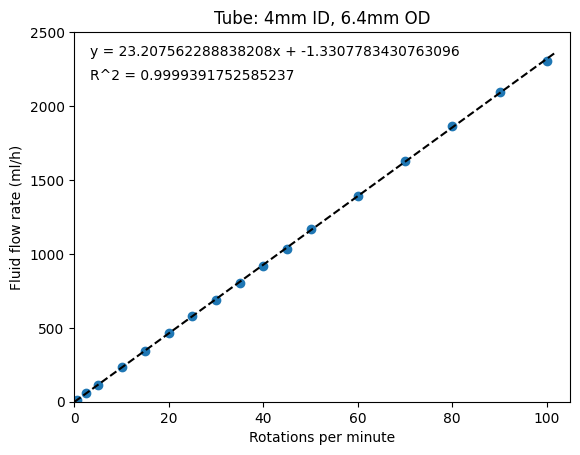

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score
np.set_printoptions(suppress=True)

w0_1 = np.array([0.9603, 0.9536, 0.9438, 0.9363, 1.7155, 1.7142, 3.5306, 3.3958,
                 3.5974, 3.2763, 3.4324])

w_1 = np.array([1.0707, 1.4274, 1.9140, 2.8800, 4.5979, 5.5755, 8.3417, 9.1526,
                10.2975, 10.9527, 12.0662])
dw1 = np.subtract(w_1,w0_1) # (ml/30s)

w0_2 = np.array([3.4314, 3.4984, 3.5219, 3.4429, 3.5327, 3.5227])
w_2 = np.array([8.2976, 9.3052, 10.3068, 11.2070, 12.2523, 13.1382])
dw2 = np.subtract(w_2,w0_2)*2 # (ml/15s)*2

dw = np.append(dw1, dw2)
vpm = dw * 2 # (ml/min)
vph = vpm * 60 # (ml/hour)
print(f'flow rate in (ml/h) is: {vph}')

rpm = np.array([0.5, 2.5, 5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 60, 70, 80, 90, 100])
plt.plot(rpm, vph, 'o')

slope, intercept = np.polyfit(rpm, vph, 1)
plt.figtext(0.15, 0.83, f'y = {slope}x + {intercept}')
poly1d_fn = np.poly1d([slope, intercept])
r_sq = r2_score(vph, poly1d_fn(rpm))
plt.figtext(0.15, 0.78, f'R^2 = {r_sq}')
x = np.array([0, 102])
plt.plot(x, poly1d_fn(x), '--k')
plt.xlabel('Rotations per minute')
plt.ylabel('Fluid flow rate (ml/h)')
plt.title('Tube: 4mm ID, 6.4mm OD')
plt.xlim(0, 105)
plt.ylim(0,2500)

In [ ]:
new_v = [0.1, 50, 100, 200, 500, 1000, 1500] # test fluid speeds
new_rpm = [(y - intercept) / slope for y in new_v]
print(f'The RPMs set for testing are:\n {np.array(new_rpm).tolist()}') # test rpm settings
vol1m = [v/60 for v in new_v] # run 1 min volume
print(f'The measured volumes in 1 minute should be:\n {vol1m}')
vol2m = [v/30 for v in new_v] # run 2 min volume
print(f'The measured volumes in 2 minutes should be:\n {vol2m}')

The RPMs set for testing are:
 [0.06165138437501683, 2.2118125852349473, 4.366282726377162, 8.675223008661591, 21.602043855514882, 43.14674526693703, 64.69144667835918]
The measured volumes in 1 minute should be:
 [0.0016666666666666668, 0.8333333333333334, 1.6666666666666667, 3.3333333333333335, 8.333333333333334, 16.666666666666668, 25.0]
The measured volumes in 2 minutes should be:
 [0.0033333333333333335, 1.6666666666666667, 3.3333333333333335, 6.666666666666667, 16.666666666666668, 33.333333333333336, 50.0]


In [ ]:
v01 = 0.3 * slope + intercept # ml/h
vol01 = v01 / 60
print(f'Flow rate is {v01} ml/h at 0.1 RPM,\n measured volume in 1 minute should be {vol01} ml')

Flow rate is 5.631490343575152 ml/h at 0.1 RPM,
 measured volume in 1 minute should be 0.0938581723929192 ml


In [ ]:
# Trial 1
volaf = np.array([0, 1.9242, 2.8671, 5.5058, 12.7588, 33.2695, 41.8742]) # volume after
volbf = np.array([0, 0.9400, 0.9841, 1.6896, 3.4726, 14.8241, 14.7776]) # volume before
volm = volaf - volbf
print(f'The measured volumes in 1 minutes are\n {volm} ml')
vm = volm * 60 # ml/h
print(f'The measured flow rates are\n {vm}')
err = (vm - new_v) /new_v * 100
print(f"The error rates are [{', '.join(f'{e:.2f}%' for e in err[0:7])}]")

In [ ]:
# Trial 2
volbf = np.array([0.9653, 0.9708, 1.7102, 1.6942, 6.5008, 14.9181, 14.8716]) # volume before
volaf = np.array([0.9996, 1.7627, 3.3315, 5.1321, 14.7777, 31.4802, 39.2155]) # volume after
volm = volaf - volbf
print(f'The measured volumes in 1 minutes are\n {volm} ml')
vm = volm * 60 # ml/h
print(f'The measured flow rates are\n {vm}')
new_v = [0.99, 50, 100, 200, 500, 1000, 1500]
err = (vm - new_v) /new_v * 100
print(f"The error rates are [{', '.join(f'{e:.2f}%' for e in err[0:7])}]")

The measured volumes in 1 minutes are
 [ 0.0343  0.7919  1.6213  3.4379  8.2769 16.5621 24.3439] ml
The measured flow rates are
 [   2.058   47.514   97.278  206.274  496.614  993.726 1460.634]
The error rates are [107.88%, -4.97%, -2.72%, 3.14%, -0.68%, -0.63%, -2.62%]


In [ ]:
# Trial 3
volbf = np.array([0.9227, 0.9557, 1.7265, 1.7032, 6.7631, 14.7067, 14.6387]) # volume before
volaf = np.array([1.0115, 1.8270, 3.3965, 4.9493, 14.9674, 31.1502, 38.2122]) # volume after
volm = volaf - volbf
print(f'The measured volumes in 1 minutes are\n {volm} ml')
vm = volm * 60 # ml/h
print(f'The measured flow rates are\n {vm}')
new_v = [3.31, 50, 100, 200, 500, 1000, 1500]
err = (vm - new_v) /new_v * 100
print(f"The error rates are [{', '.join(f'{e:.2f}%' for e in err[0:7])}]")

The measured volumes in 1 minutes are
 [ 0.0888  0.8713  1.67    3.2461  8.2043 16.4435 23.5735] ml
The measured flow rates are
 [   5.328   52.278  100.2    194.766  492.258  986.61  1414.41 ]
The error rates are [60.97%, 4.56%, 0.20%, -2.62%, -1.55%, -1.34%, -5.71%]


In [ ]:
# Trial 4
volbf = np.array([0.9470, 0.9405, 0.9505, 1.7010, 3.4300, 14.9532, 14.9842]) # volume before
volaf = np.array([1.0787, 1.8048, 2.6211, 4.9748, 11.5858, 31.3607, 39.5351]) # volume after
volm = volaf - volbf
print(f'The measured volumes in 1 minutes are\n {volm} ml')
vm = volm * 60 # ml/h
print(f'The measured flow rates are\n {vm}')
new_v = [5.63, 50, 100, 200, 500, 1000, 1500]
err = (vm - new_v) /new_v * 100
print(f"The error rates are [{', '.join(f'{e:.2f}%' for e in err[0:7])}]")

The measured volumes in 1 minutes are
 [ 0.1317  0.8643  1.6706  3.2738  8.1558 16.4075 24.5509] ml
The measured flow rates are
 [   7.902   51.858  100.236  196.428  489.348  984.45  1473.054]
The error rates are [40.36%, 3.72%, 0.24%, -1.79%, -2.13%, -1.56%, -1.80%]


In [ ]:
# Trial 5
volbf = np.array([0.9451, 0.9595, 1.6877, 3.4744, 15.0227, 14.8489, 14.9487]) # volume before
volaf = np.array([1.2295, 2.6182, 5.0096, 10.0756, 31.3613, 47.4982, 64.5024]) # volume after
volm = volaf - volbf
print(f'The measured volumes in 2 minutes are\n {volm} ml')
vm = volm * 30 # ml/h
print(f'The measured flow rates are\n {vm}')
new_v = [5.63, 50, 100, 200, 500, 1000, 1500]
err = (vm - new_v) /new_v * 100
print(f"The error rates are [{', '.join(f'{e:.2f}%' for e in err[0:7])}]")

The measured volumes in 1 minutes are
 [ 0.2844  1.6587  3.3219  6.6012 16.3386 32.6493 49.5537] ml
The measured flow rates are
 [   8.532   49.761   99.657  198.036  490.158  979.479 1486.611]
The error rates are [51.55%, -0.48%, -0.34%, -0.98%, -1.97%, -2.05%, -0.89%]


In [ ]:
# Trial mini
volbf = np.array([0.9211, 0.9634, 0.9151]) # volume before
volaf = np.array([1.0002, 1.1194, 1.1449]) # volume after
volm = volaf - volbf
print(f'The measured volumes in 2 minutes are\n {volm} ml')
vm = volm * 30 # ml/h
print(f'The measured flow rates are\n {vm}')
mini_r = [0.1, 0.2, 0.3]
mini_v = [r * slope + intercept for r in mini_r]
err = (vm - mini_v) /mini_v * 100
print(f"The error rates are [{', '.join(f'{e:.2f}%' for e in err[0:3])}]")

The measured volumes in 2 minutes are
 [0.0791 0.156  0.2298] ml
The measured flow rates are
 [2.373 4.68  6.894]
The error rates are [139.70%, 41.36%, 22.42%]


In [ ]:
# Trial 6
volbf = np.array([0, 0.9409, 1.6789, 3.4736, 15.0227, 14.8489, 14.9199]) # volume before
volaf = np.array([0, 2.2770, 5.0566, 8.5728, 31.8057, 47.4940, 63.9196]) # volume after
volm = volaf - volbf # ml/500s, ml/2min
print(f'The measured volumes in 1 minutes are\n {volm} ml')
vm1 = volm[0]/500*3600 # ml/h
vm2 = volm[1:7] * 30 # ml/h
vm = np.append(vm1, vm2)
print(f'The measured flow rates are\n {vm}')
new_v = [0.1, 50, 100, 200, 500, 1000, 1500]
err = (vm - new_v) /new_v * 100
print(f"The error rates are [{', '.join(f'{e:.2f}%' for e in err[0:7])}]")

The measured volumes in 1 minutes are
 [ 0.      1.3361  3.3777  5.0992 16.783  32.6451 48.9997] ml
The measured flow rates are
 [   0.      40.083  101.331  152.976  503.49   979.353 1469.991]
The error rates are [-100.00%, -19.83%, 1.33%, -23.51%, 0.70%, -2.06%, -2.00%]


In [ ]:
# Trial 7
volbf = np.array([0.9604, 0.9418, 1.7135, 3.4315, 14.8418, 14.7901, 14.9213]) # volume before
volaf = np.array([1.0376, 2.5904, 4.9850, 9.9365, 31.1763, 47.2007, 63.7306]) # volume after
volm = volaf - volbf # ml/1000s, ml/2min
print(f'The measured volumes are\n {volm} ml')
vm1 = volm[0]/1000*3600 # ml/h
vm2 = volm[1:7] * 30 # ml/h
vm = np.append(vm1, vm2)
print(f'The measured flow rates are\n {vm}')
new_v = [0.1, 50, 100, 200, 500, 1000, 1500]
err = (vm - new_v) /new_v * 100
print(f"The error rates are [{', '.join(f'{e:.2f}%' for e in err[0:7])}]")

The measured volumes are
 [ 0.0772  1.6486  3.2715  6.505  16.3345 32.4106 48.8093] ml
The measured flow rates are
 [   0.27792   49.458     98.145    195.15     490.035    972.318
 1464.279  ]
The error rates are [177.92%, -1.08%, -1.85%, -2.42%, -1.99%, -2.77%, -2.38%]


In [ ]:
# Trial mini 2
mini_r = [0.1, 0.2, 0.3]
mini_v = [r * slope + intercept for r in mini_r]
print(f'The flow rates should be:\n {mini_v}')
mini_vol = [v/12 for v in mini_v]
print(f'The volumes in 5 minutes should be:\n {mini_vol}')

volbf = np.array([0.9498, 0.9430, 0.9473]) # volume before
volaf = np.array([1.1519, 1.3420, 1.5613]) # volume after
volm = volaf - volbf
print(f'The measured volumes in 5 minutes are\n {volm} ml')
vm = volm * 12 # ml/h
print(f'The measured flow rates are\n {vm}')
err = (vm - mini_v) /mini_v * 100
print(f"The error rates are [{', '.join(f'{e:.2f}%' for e in err[0:3])}]")

The flow rates should be:
 [np.float64(0.9899778858075114), np.float64(3.3107341146913325), np.float64(5.631490343575152)]
The volumes in 5 minutes should be:
 [np.float64(0.08249815715062596), np.float64(0.275894509557611), np.float64(0.46929086196459596)]
The measured volumes in 5 minutes are
 [0.2021 0.399  0.614 ] ml
The measured flow rates are
 [2.4252 4.788  7.368 ]
The error rates are [144.98%, 44.62%, 30.84%]


In [ ]:
# Trial 8
print(f'The volume collected in 1000ms should be:\n {0.1/3600*1000} mL.')
volbf = np.array([0.9155, 0.9427, 0.9434, 0.9555, 0.9448]) # volume before
volaf = np.array([0.9462, 0.9656, 0.9572, 0.9839, 0.9688]) # volume after
volm = volaf - volbf # ml/1000s, ml/2min
print(f'The measured volumes are\n {volm} ml')
vm = volm/1000*3600 # ml/h
print(f'The measured flow rates are\n {vm}')
new_v = [0.1, 0.1, 0.1, 0.1, 0.1]
err = (vm - new_v) /new_v * 100
print(f"The error rates are [{', '.join(f'{e:.2f}%' for e in err[0:7])}]")

The volume collected in 1000ms should be:
 0.02777777777777778 mL.
The measured volumes are
 [0.0307 0.0229 0.0138 0.0284 0.024 ] ml
The measured flow rates are
 [0.11052 0.08244 0.04968 0.10224 0.0864 ]
The error rates are [10.52%, -17.56%, -50.32%, 2.24%, -13.60%]


In [ ]:
# Trial 9
volbf = np.array([0.9266, 0.9425, 0.9530, 1.7084, 3.2900, 14.6879, 14.7829, 14.8627]) # volume before
volaf = np.array([0.9546, 2.6919, 2.5864, 5.0309, 9.9689, 31.1649, 47.5739, 64.0594]) # volume after
volm = volaf - volbf # ml/1000s, ml/2min
print(f'The measured volumes are\n {volm} ml')
vm1 = volm[0]/1000*3600 # ml/h
vm2 = volm[1:8] * 30 # ml/h
vm = np.append(vm1, vm2)
print(f'The measured flow rates are\n {vm}')
new_v = [0.1, 50, 50, 100, 200, 500, 1000, 1500]
err = (vm - new_v) /new_v * 100
print(f"The error rates are [{', '.join(f'{e:.2f}%' for e in err[0:7])}]")

The measured volumes are
 [ 0.028   1.7494  1.6334  3.3225  6.6789 16.477  32.791  49.1967] ml
The measured flow rates are
 [   0.1008   52.482    49.002    99.675   200.367   494.31    983.73
 1475.901 ]
The error rates are [0.80%, 4.96%, -2.00%, -0.33%, 0.18%, -1.14%, -1.63%]


In [ ]:
# Trial 9 using 999s and 1min 59s on display
volbf = np.array([0.9266, 0.9530, 1.7084, 3.2900, 14.6879, 14.7829, 14.8627]) # volume before
volaf = np.array([0.9546, 2.5864, 5.0309, 9.9689, 31.1649, 47.5739, 64.0594]) # volume after
volm = volaf - volbf # ml/1000s, ml/2min
print(f'The measured volumes are\n {volm} ml')
vm1 = volm[0]/999*3600 # ml/h
vm2 = volm[1:7]/119*3600 # ml/h
vm = np.append(vm1, vm2)
print(f'The measured flow rates are\n {vm}')
new_v = [0.1, 50, 100, 200, 500, 1000, 1500]
err = (vm - new_v) /new_v * 100
print(f"The error rates are [{', '.join(f'{e:.2f}%' for e in err[0:7])}]")

The measured volumes are
 [ 0.028   1.6334  3.3225  6.6789 16.477  32.791  49.1967] ml
The measured flow rates are
 [   0.1009009    49.41378151  100.51260504  202.0507563   498.46386555
  991.99663866 1488.30352941]
The error rates are [0.90%, -1.17%, 0.51%, 1.03%, -0.31%, -0.80%, -0.78%]


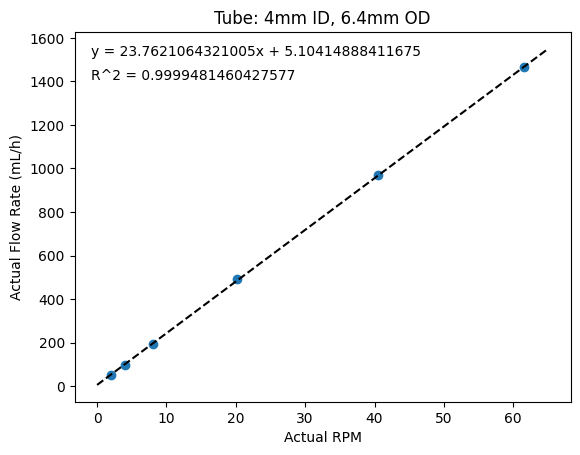

In [ ]:
# Find relationship between actual RPM and actual flow rate
r_ac = np.array([2.0, 4.0, 8.0, 20.2, 40.5, 61.6])
v_ac = np.array([49.46, 98.15, 195.15, 490.04, 972.32, 1464.28])
plt.plot(r_ac, v_ac, 'o')
plt.xlabel('Actual RPM')
plt.ylabel('Actual Flow Rate (mL/h)')
plt.title('Tube: 4mm ID, 6.4mm OD')

s_ac, int_ac = np.polyfit(r_ac, v_ac, 1)
plt.figtext(0.15, 0.83, f'y = {s_ac}x + {int_ac}')
poly1d_fn_ac = np.poly1d([s_ac, int_ac])
r_sq_ac = r2_score(v_ac, poly1d_fn_ac(r_ac))
plt.figtext(0.15, 0.78, f'R^2 = {r_sq_ac}')
x = np.array([0, 65])
plt.plot(x, poly1d_fn_ac(x), '--k')


In [ ]:
# Test buye 1
v_buye = [200, 400, 800, 1200, 1600, 1000, 2000]
r_buye = [(v - intercept) / slope for v in v_buye]
print(f'The input RPMs for buye should be:\n {np.array(r_buye).tolist()}')
vol_buye = [v/30 for v in v_buye]
print(f'The measured volumes in 2 minutes should be:\n {vol_buye}')

volbf = np.array([3.4737, 6.6543, 14.8243, 14.8107, 14.5902, 14.7664, 14.8154+6.5040]) # volume before
volaf = np.array([10.1558, 20.3774, 41.1205, 53.1521, 66.2246, 47.2650, 66.1874+19.0184]) # volume after
volm = volaf - volbf # ml/1000s, ml/2min
print(f'The actual measured volumes are\n {volm} ml')

err = (volm - vol_buye) / vol_buye * 100
print(f"The error rates are [{', '.join(f'{e:.2f}%' for e in err[0:7])}]")

The input RPMs for buye should be:
 [8.675223008661591, 17.293103573230454, 34.528864702368175, 51.764625831505896, 69.00038696064362, 43.14674526693703, 86.23614808978134]
The measured volumes in 2 minutes should be:
 [6.666666666666667, 13.333333333333334, 26.666666666666668, 40.0, 53.333333333333336, 33.333333333333336, 66.66666666666667]
The actual measured volumes are
 [ 6.6821 13.7231 26.2962 38.3414 51.6344 32.4986 63.8864] ml
The error rates are [0.23%, 2.92%, -1.39%, -4.15%, -3.19%, -2.50%, -4.17%]


In [ ]:
# Test buye 2
v_buye = [200, 400, 800, 1200, 1600, 1000, 2000]
r_buye = [(v - intercept) / slope for v in v_buye]
print(f'The input RPMs for buye should be:\n {np.array(r_buye).tolist()}')
vol_buye = [v/30 for v in v_buye]
print(f'The measured volumes in 2 minutes should be:\n {vol_buye}')

volbf = np.array([3.2753, 6.7579, 13.0142, 13.0643, 13.1304, 13.1293, 13.0084+6.6463]) # volume before
volaf = np.array([9.8578, 19.9359, 38.9633, 56.2658, 65.1465, 45.2932, 64.3940+20.2462]) # volume after
volm = volaf - volbf # ml/1000s, ml/2min
print(f'The actual measured volumes are\n {volm} ml')

err = (volm - vol_buye) / vol_buye * 100
print(f"The error rates are [{', '.join(f'{e:.2f}%' for e in err[0:7])}]")

The input RPMs for buye should be:
 [8.675223008661591, 17.293103573230454, 34.528864702368175, 51.764625831505896, 69.00038696064362, 43.14674526693703, 86.23614808978134]
The measured volumes in 2 minutes should be:
 [6.666666666666667, 13.333333333333334, 26.666666666666668, 40.0, 53.333333333333336, 33.333333333333336, 66.66666666666667]
The actual measured volumes are
 [ 6.5825 13.178  25.9491 43.2015 52.0161 32.1639 64.9855] ml
The error rates are [-1.26%, -1.16%, -2.69%, 8.00%, -2.47%, -3.51%, -2.52%]


In [ ]:
# Test buye 3
v_buye = [200, 400, 800, 1200, 1600, 1000, 2000]
r_buye = [(v - intercept) / slope for v in v_buye]
print(f'The input RPMs for buye should be:\n {np.array(r_buye).tolist()}')
vol_buye = [v/3600*120 for v in v_buye]
print(f'The measured volumes in 2 minutes should be:\n {vol_buye}')

volbf = np.array([3.2753, 6.6130, 13.0142, 13.0643, 13.1304, 13.1293, 13.0084+6.6463]) # volume before
volaf = np.array([9.8915, 19.7650, 38.8458, 52.4176, 65.0859, 45.2581, 64.8339+19.7914]) # volume after
volm = volaf - volbf # ml/1000s, ml/2min
print(f'The actual measured volumes are\n {volm} ml')

err = (volm - vol_buye) / vol_buye * 100
print(f"The error rates are [{', '.join(f'{e:.2f}%' for e in err[0:7])}]")

The input RPMs for buye should be:
 [8.675223008661591, 17.293103573230454, 34.528864702368175, 51.764625831505896, 69.00038696064362, 43.14674526693703, 86.23614808978134]
The measured volumes in 2 minutes should be:
 [6.666666666666666, 13.333333333333332, 26.666666666666664, 40.0, 53.33333333333333, 33.333333333333336, 66.66666666666667]
The actual measured volumes are
 [ 6.6162 13.152  25.8316 39.3533 51.9555 32.1288 64.9706] ml
The error rates are [-0.76%, -1.36%, -3.13%, -1.62%, -2.58%, -3.61%, -2.54%]


The flow rates based on RPM inputs should be:
 [   0.98997789   52.04661492  100.78249573  207.53728226  509.23559201
 1019.80196237 1507.16077043]
The actual-input error rates are [-100.00%, 13.46%, 12.10%, 10.33%, 9.41%, 8.52%, 7.87%]


Text(0, 0.5, 'Actual flow rate (ml/h)')

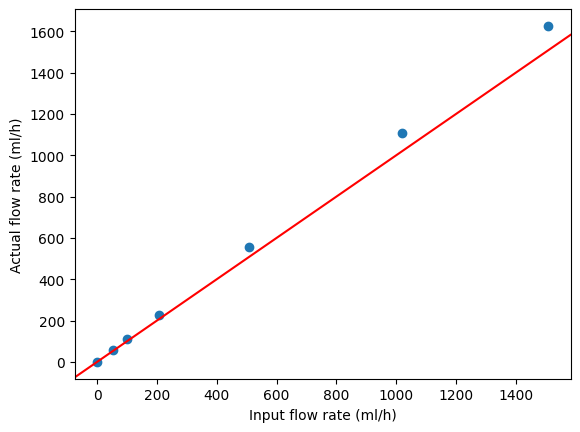

In [ ]:
rin = np.array([0.1, 2.3, 4.4, 9, 22, 44, 65]) # input RPM
vin = rin * slope + intercept # input velocity
print(f'The flow rates based on RPM inputs should be:\n {vin}')
errin = (vm - vin) /vin * 100
print(f"The actual-input error rates are [{', '.join(f'{e:.2f}%' for e in errin[0:7])}]")

plt.plot(vin, vm, 'o')
plt.axline((0, 0), slope=1, color='red')
plt.xlabel('Input flow rate (ml/h)')
plt.ylabel('Actual flow rate (ml/h)')
# FINISH CODING



In [ ]:
# Plot actual flow rate vs. input RPM, calculate equation, then calc new RPM to adjust
print(2.3*(1-0.1346))
print(4.4*(1-0.1210))
print(9*(1-0.1033))
print(22*(1-0.0941))
print(44*(1-0.0852))
print(65*(1-0.0787))
print(180*0.9, 350*0.9, 520*0.9, 690*0.9, 870*0.9)
print(3.9*(1+0.0272))
print(8.1*(1-0.0314))
print(59.9*(1-0.0262))
print(40.3/43.1*64.7)

1.9904199999999996
3.8676000000000004
8.0703
19.9298
40.251200000000004
59.8845
162.0 315.0 468.0 621.0 783.0
4.00608
7.84566
58.330619999999996
60.49675174013921


In [ ]:
r_min = 0.1 # set min RPM to 0.1
v_min = slope * r_min + intercept
print(f'Minimum fluid speed available is {v_min} ml/h at {r_min} RPM')
t_run = 0.1/v_min * 60 * 60
print(f'For 0.1mL/h, run at {r_min} rpm for {t_run} sec, then stop for {3600 - t_run} sec.')

Minimum fluid speed available is 0.9899778858075114 ml/h at 0.1 RPM
For 0.1mL/h, run at 0.1 rpm for 363.6444865698722 sec, then stop for 3236.3555134301278 sec.


In [ ]:
r_max = 100 # max RPM is 100
v_max = slope * r_max + intercept
print(f'Theoretical maximum fluid speed available is {v_max} ml/h at {r_max} RPM, actual measured 2307.72 ml/h')

Theoretical maximum fluid speed available is 2319.4254505407444 ml/h at 100 RPM, actual measured 2307.72 ml/h


In [ ]:
buye = [50, 100, 200, 250, 300, 400, 500] # ml
v_buye= [vol/15 * 60 for vol in buye] # ml/h
print(f'To infuse within 15 minutes, minimum constant speed required are:\n{v_buye} ml/h')
rpm_buye = [(v_b - intercept) / slope for v_b in v_buye]
print(f'The input RPMs are {np.array(rpm_buye).tolist()}')

To infuse within 15 minutes, minimum constant speed required are:
[200.0, 400.0, 800.0, 1000.0000000000001, 1200.0, 1600.0, 2000.0000000000002] ml/h
The input RPMs are [8.675223008661591, 17.293103573230454, 34.528864702368175, 43.14674526693704, 51.764625831505896, 69.00038696064362, 86.23614808978135]


In [ ]:
11.5+40/60

12.166666666666666